In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

import os
import numpy as np

import h5py
import pickle

### Data

In [2]:
f = h5py.File("../vrsmote/data/datasets27.hdf5", "r")

datasets = list(f["/"].attrs["datasets"])
datasets.remove("webpage")
datasets.remove("isolet")
datasets.remove("mammography")
datasets.remove("protein_homo")
datasets.remove("satimage")
datasets.remove("arrhythmia")

In [3]:
#scores_test = np.load("../vrsmote/data/_cvn_test_knn_f1_2024-02-07_15-18-46_4-25-5-5.npy")
scores_train_val = pickle.load(open("../vrsmote/data/_cvn_train_val_gb_f1_2024-02-08_01-35-22_4-25-5-5.pkl", "rb"))
#best_params = pickle.load(open("../vrsmote/data/_cvn_best_params_knn_f1_2024-02-07_15-18-46_4-25-5-5.pkl", "rb"))
scores_train_val.shape

(21, 4, 25, 100, 2, 25)

### Hyperparameters

In [4]:
ks = [3, 5, 7, 9, 11]
ps = [list(range(3, k+1)) for k in ks]

start_end_idx = []
start_idx = 0

for k_i, k in enumerate(ks):
    end_idx = start_idx + len(ps[k_i])
    start_end_idx.append((start_idx, end_idx))
    start_idx = end_idx
    
start_end_idx

[(0, 1), (1, 4), (4, 9), (9, 16), (16, 25)]

In [5]:
metric_idx = 0 # F1
smote_idx = 0 # SMOTE/B-SMOTE
simplicial_idx = -2 # Simplicial/B-Simplicial

### Sensitivity

In [6]:
colors = {0: "red", 1: "orange", 2: "green", 3: "blue", 4: "darkviolet"}

ecoli


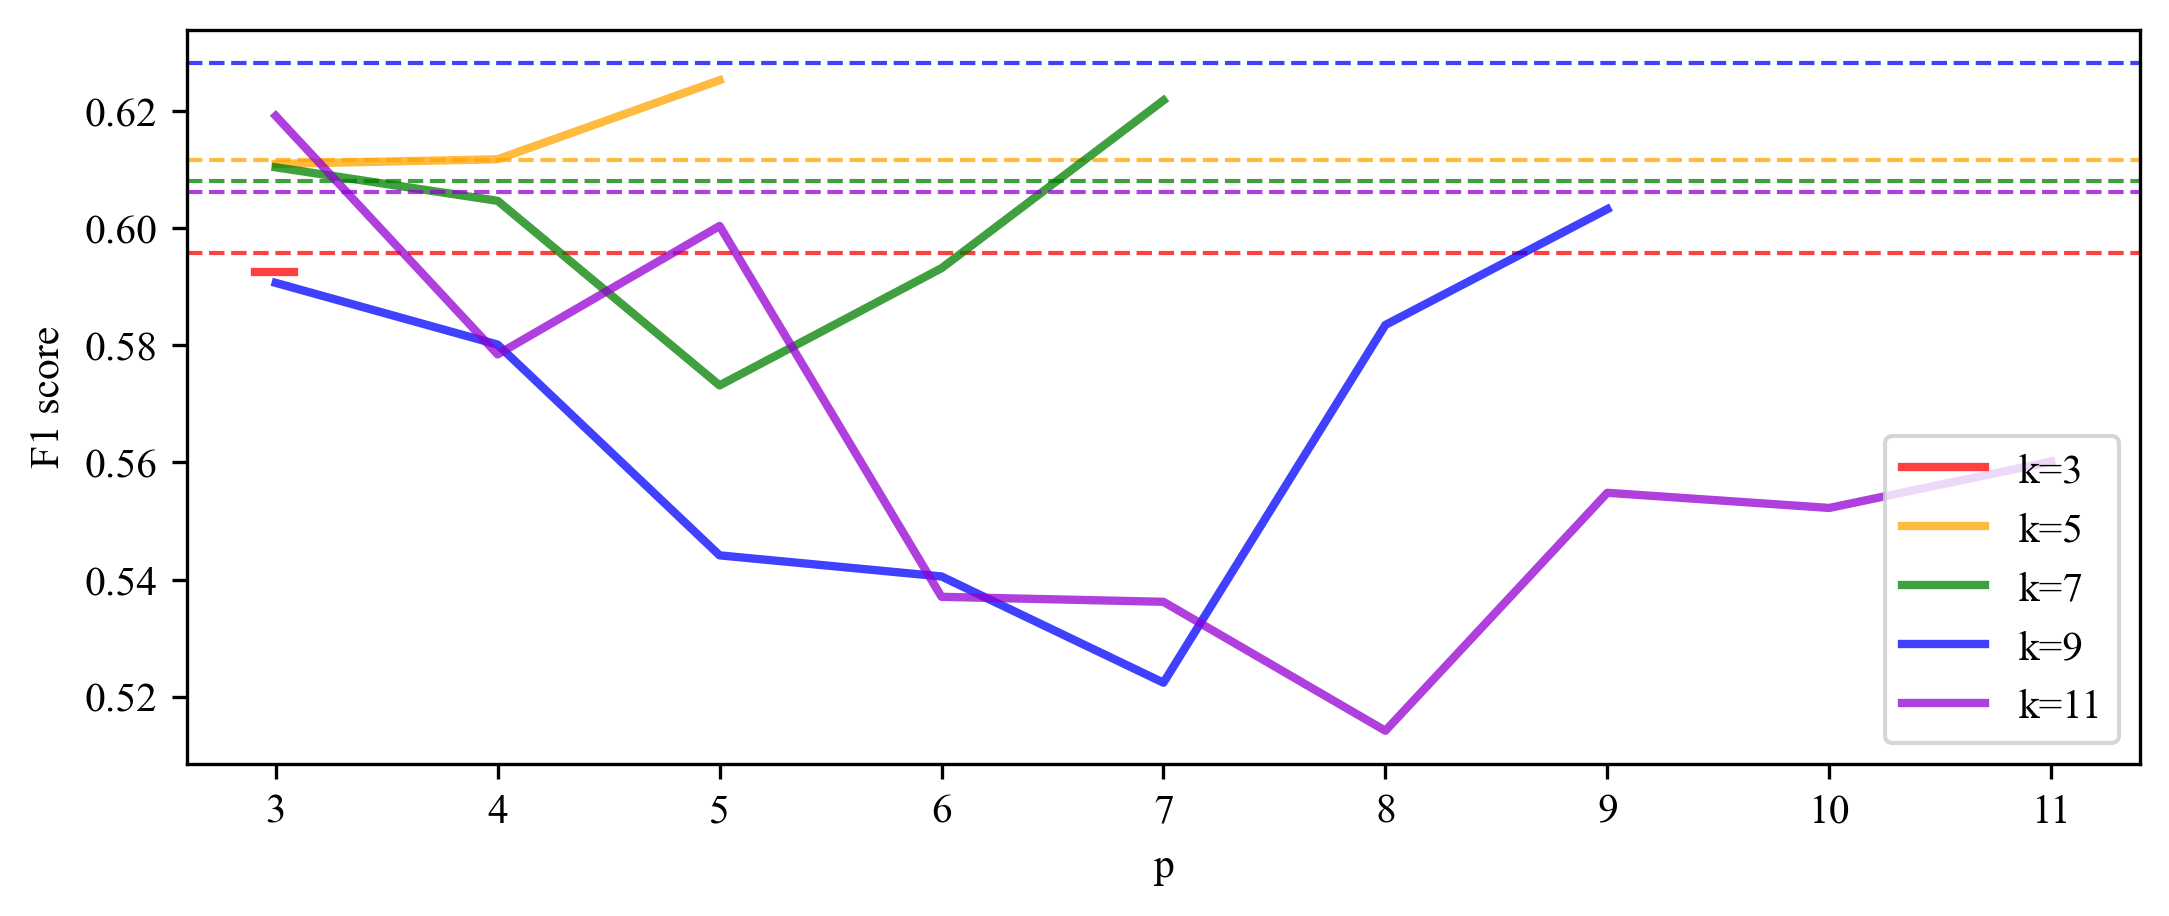

optical_digits


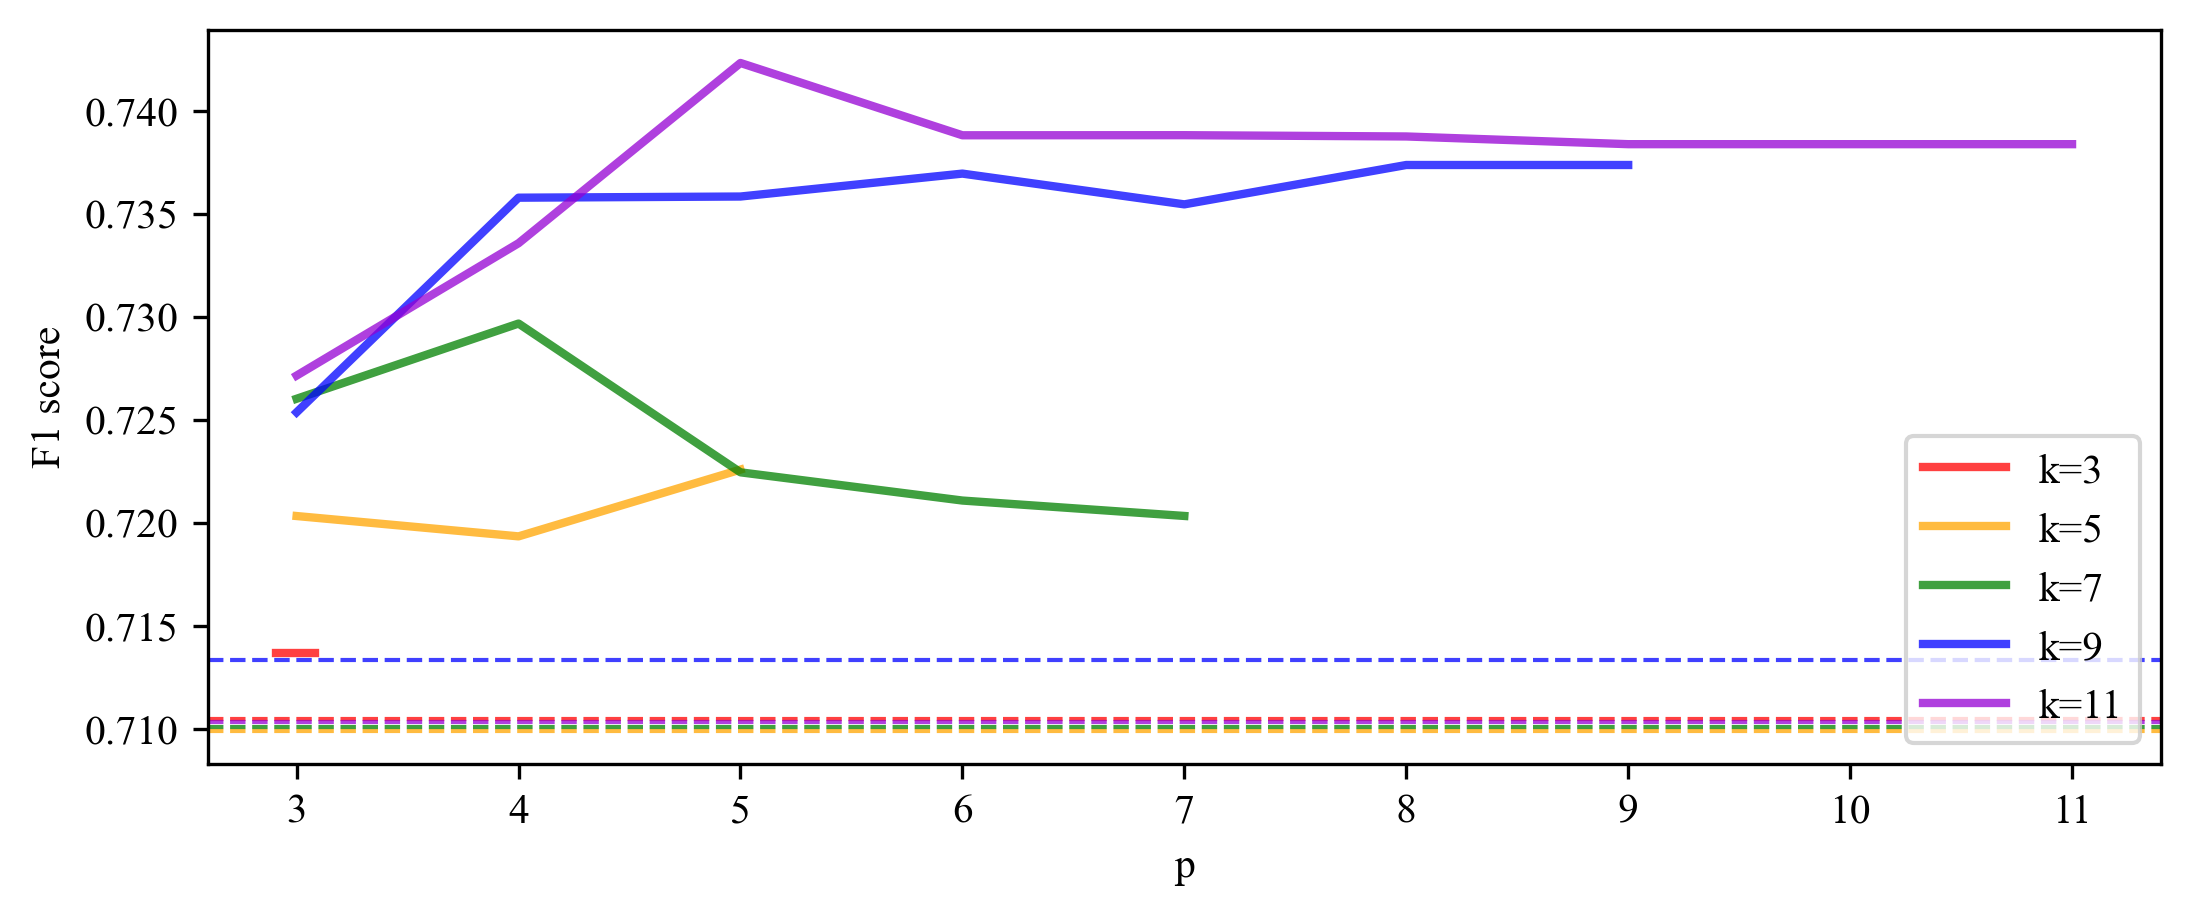

pen_digits


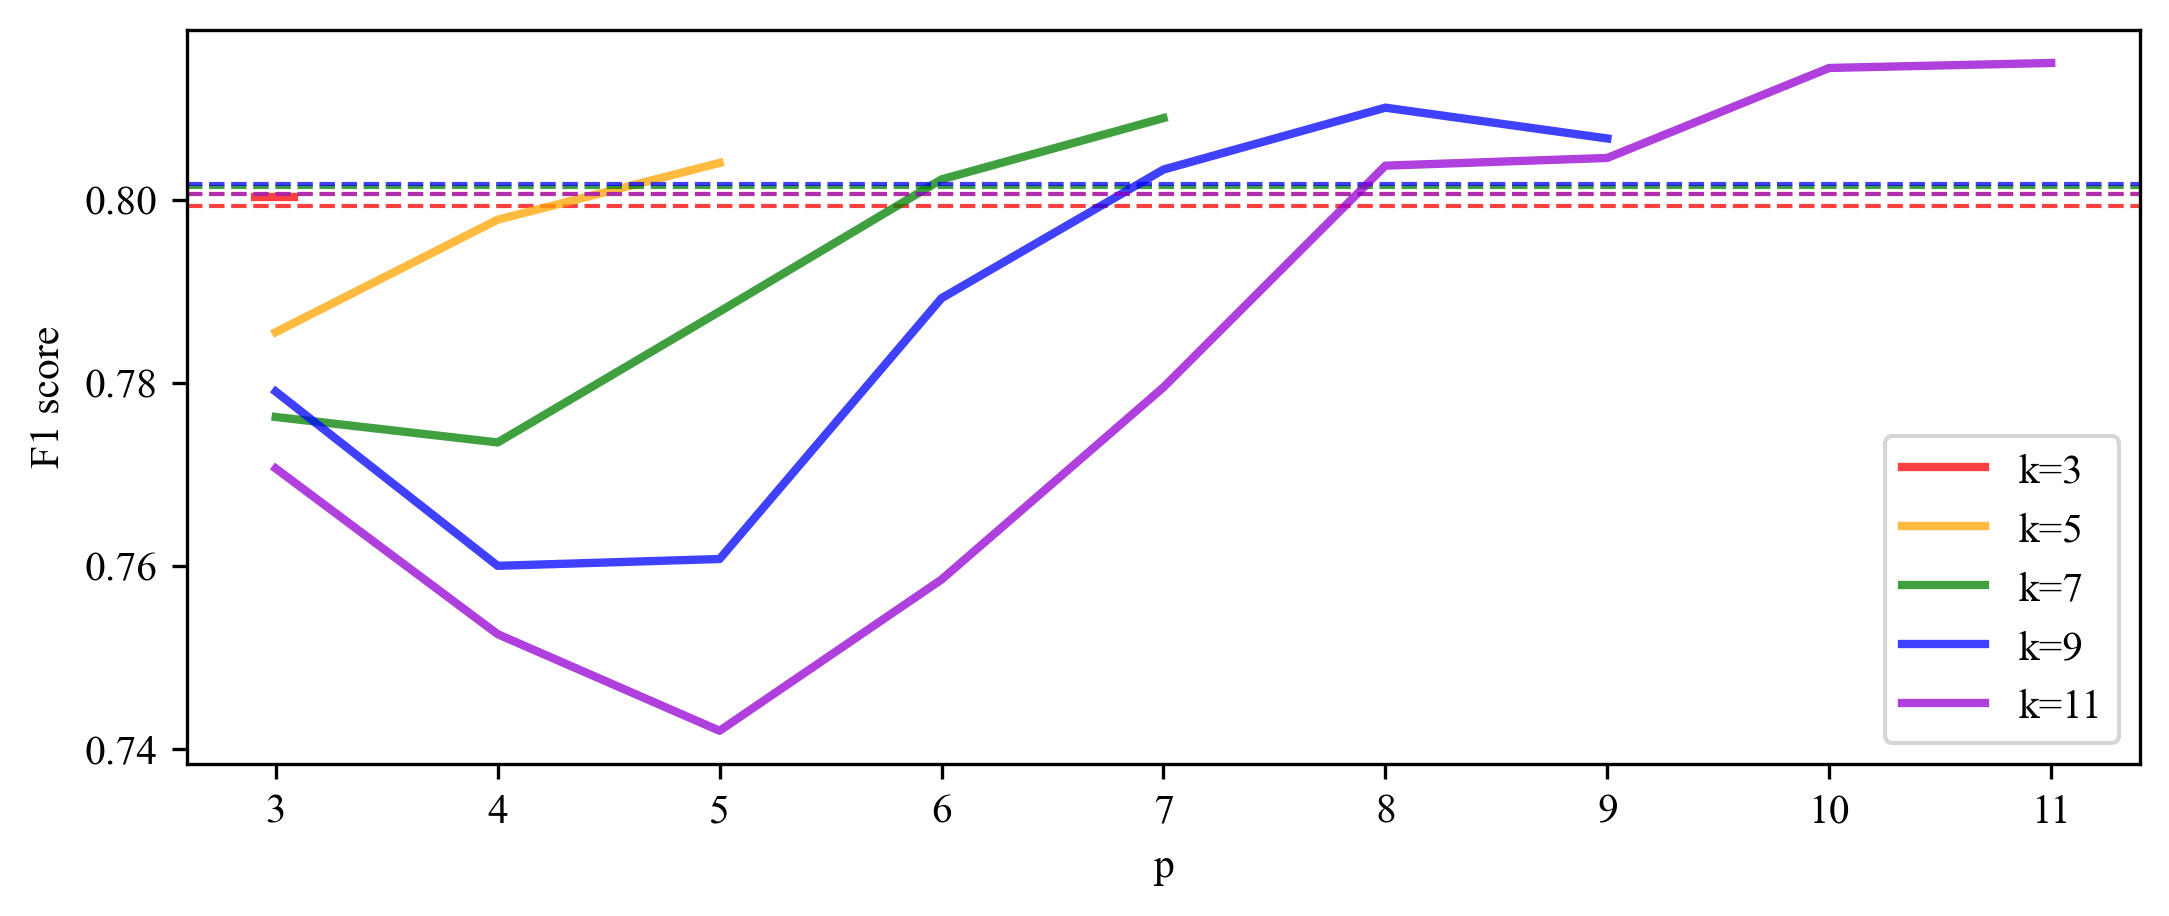

abalone


sick_euthyroid


spectrometer


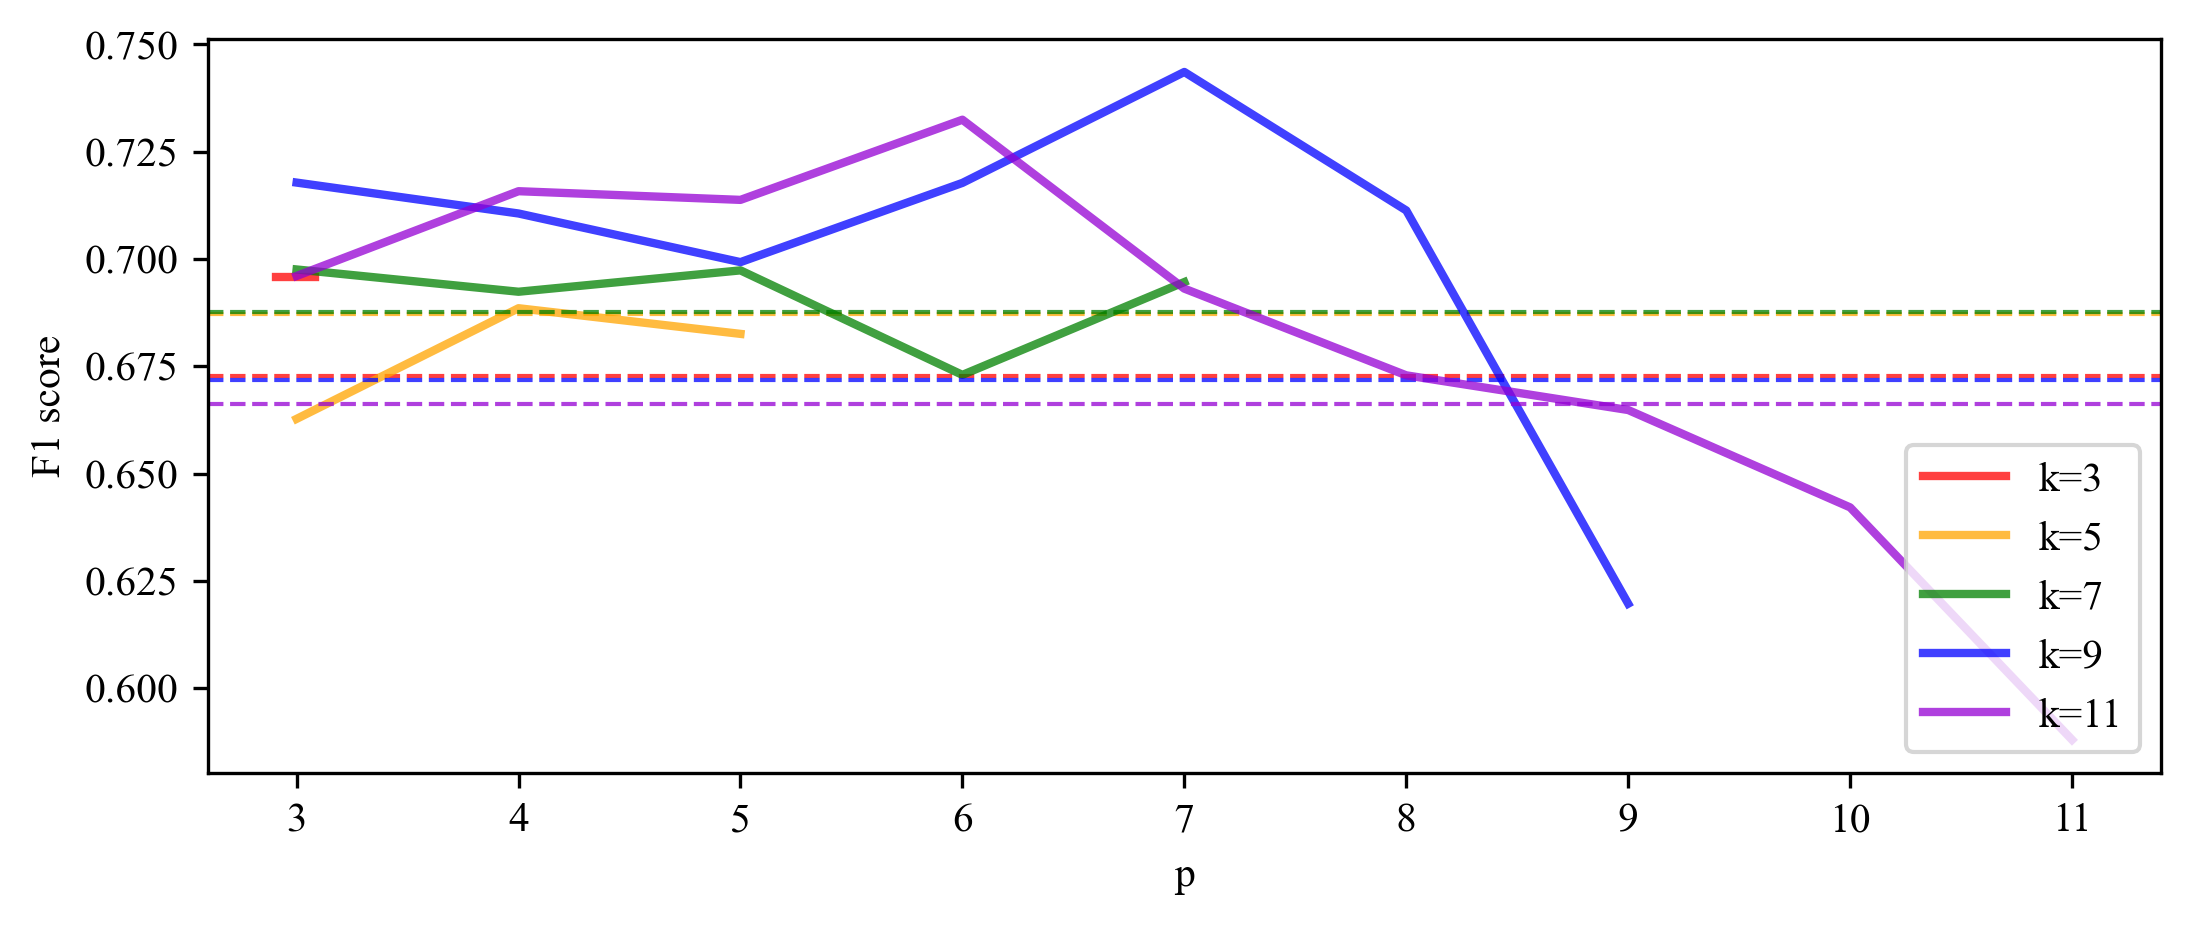

car_eval_34


us_crime


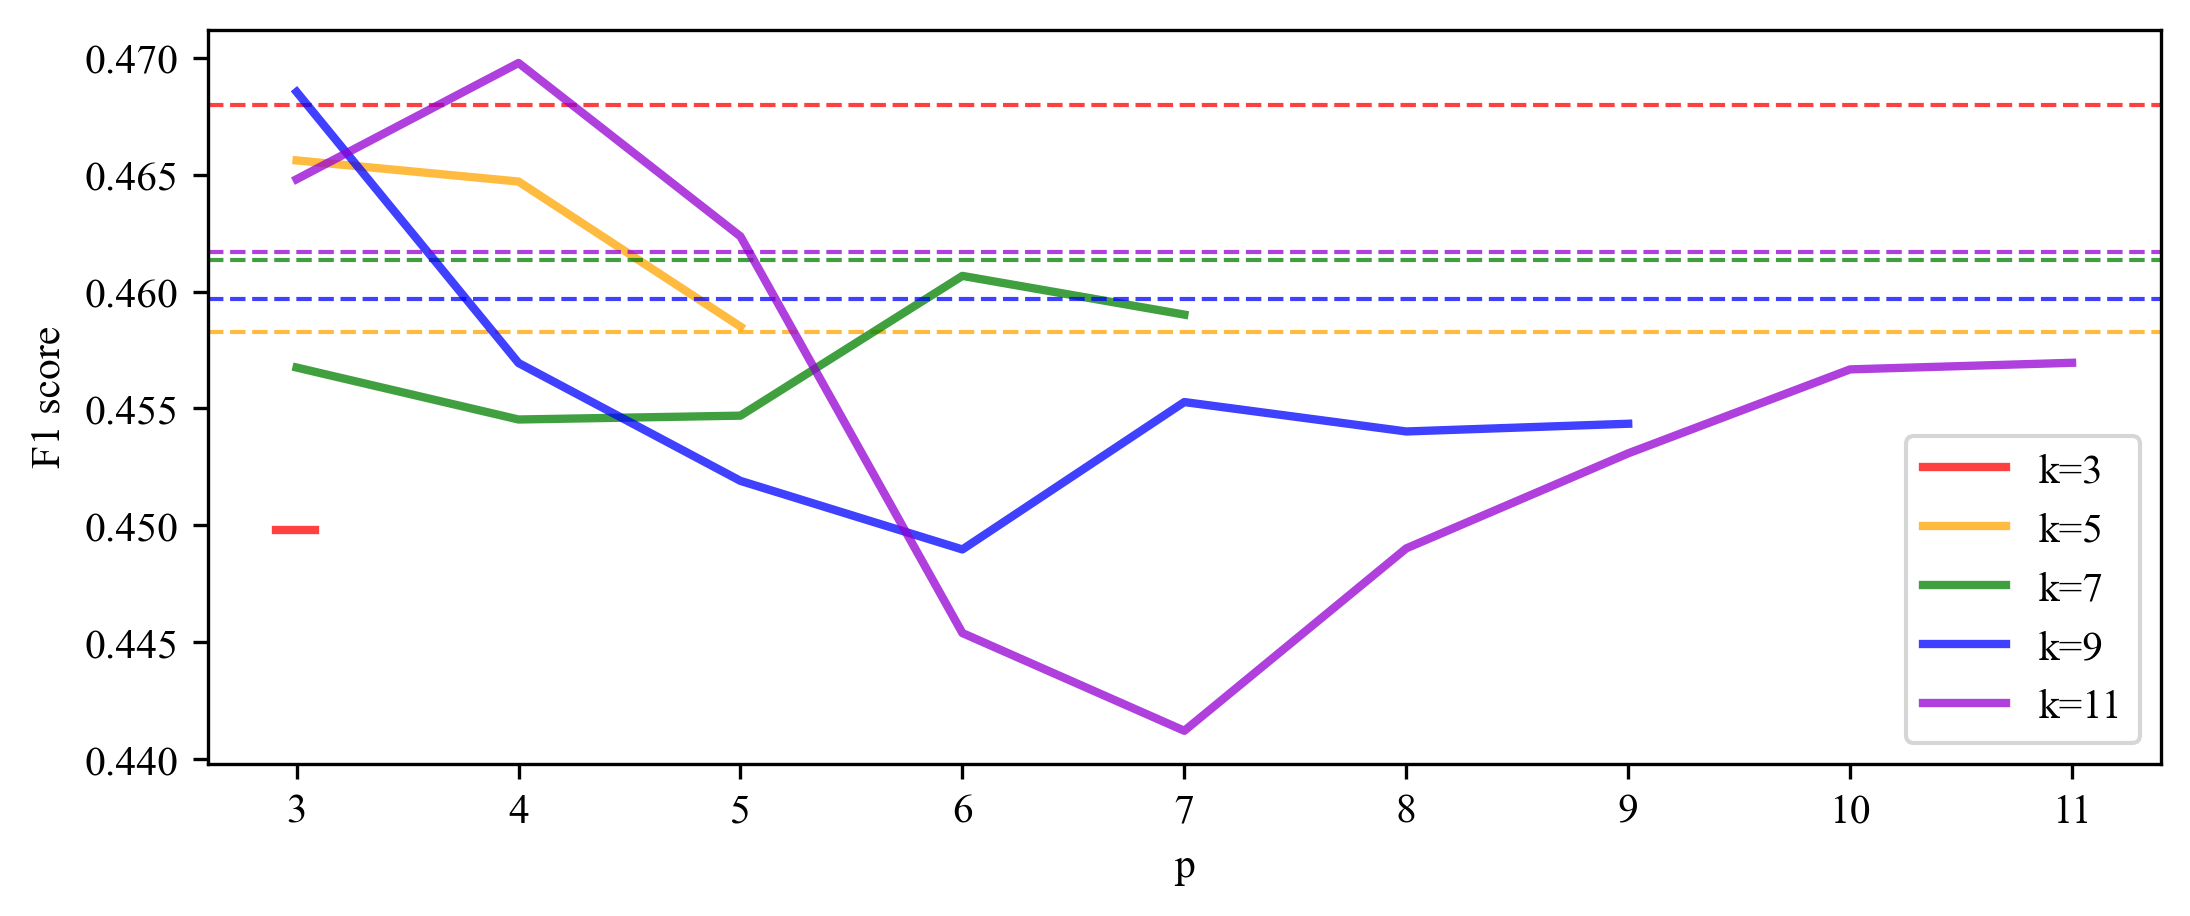

yeast_ml8


scene


libras_move


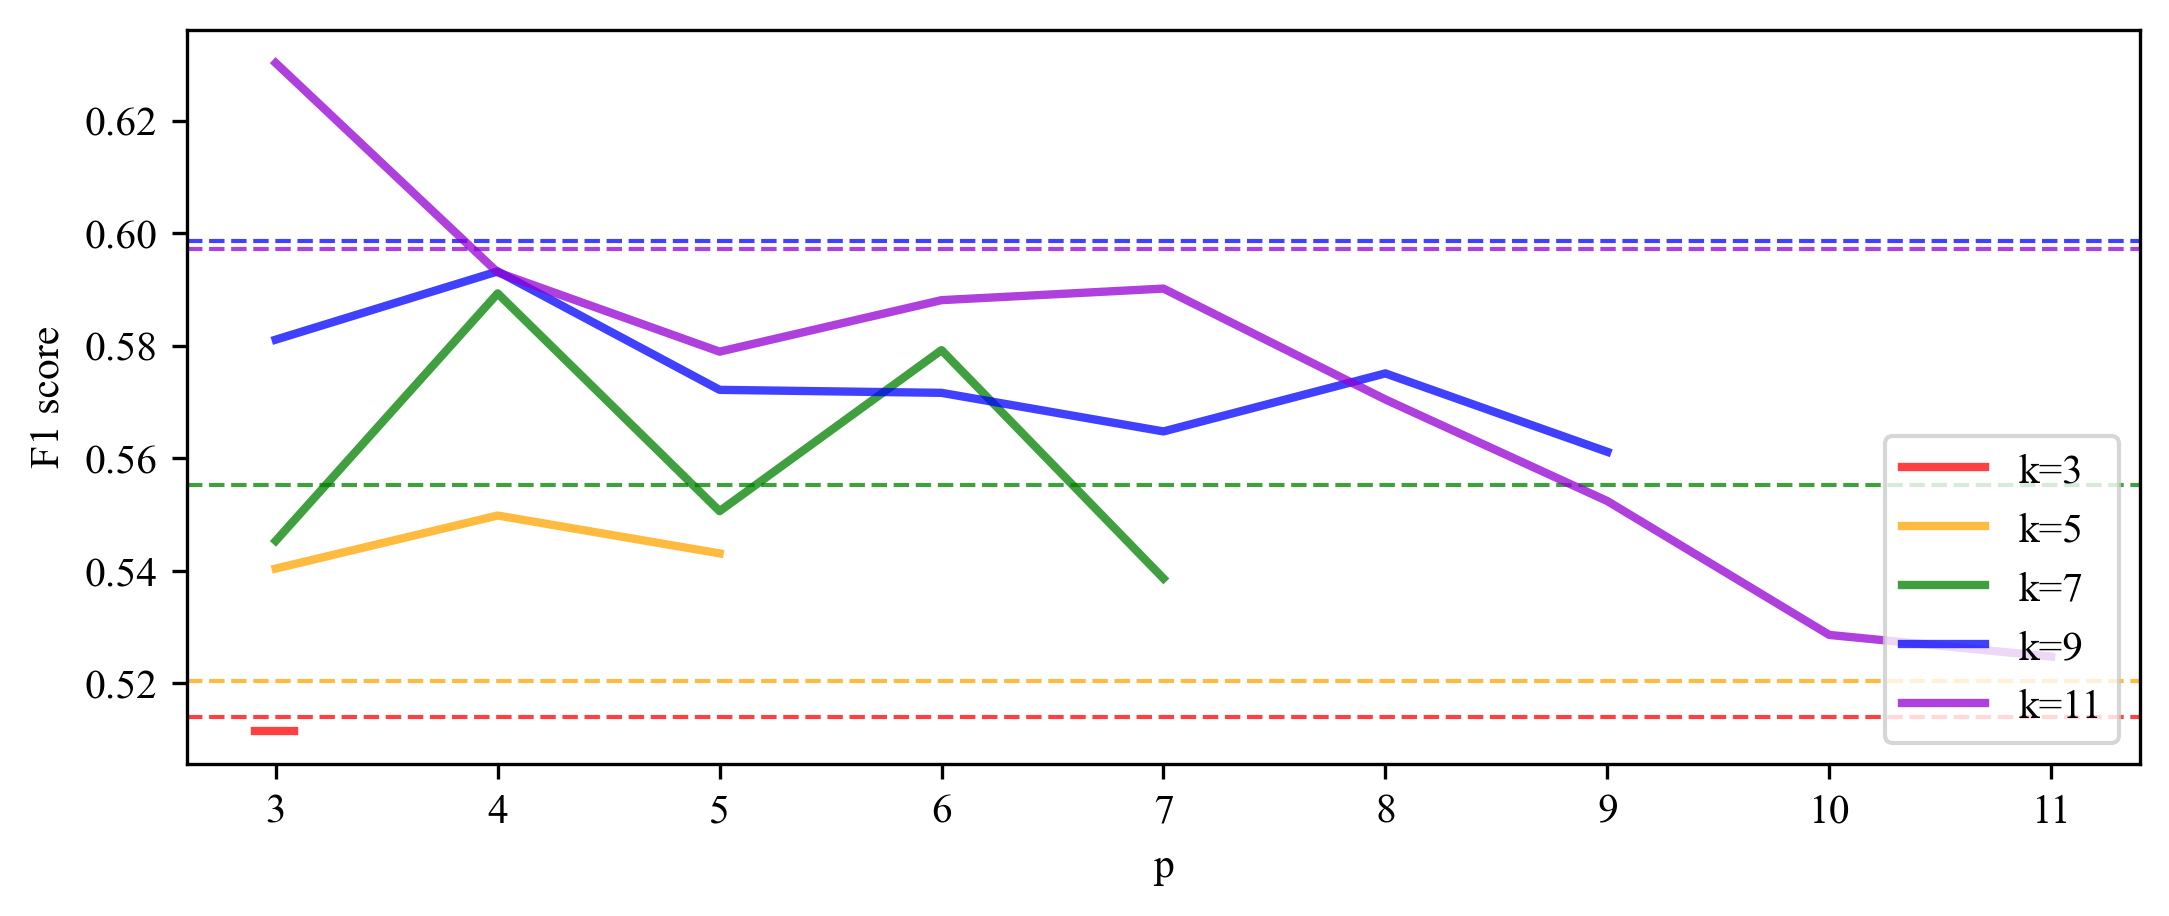

thyroid_sick


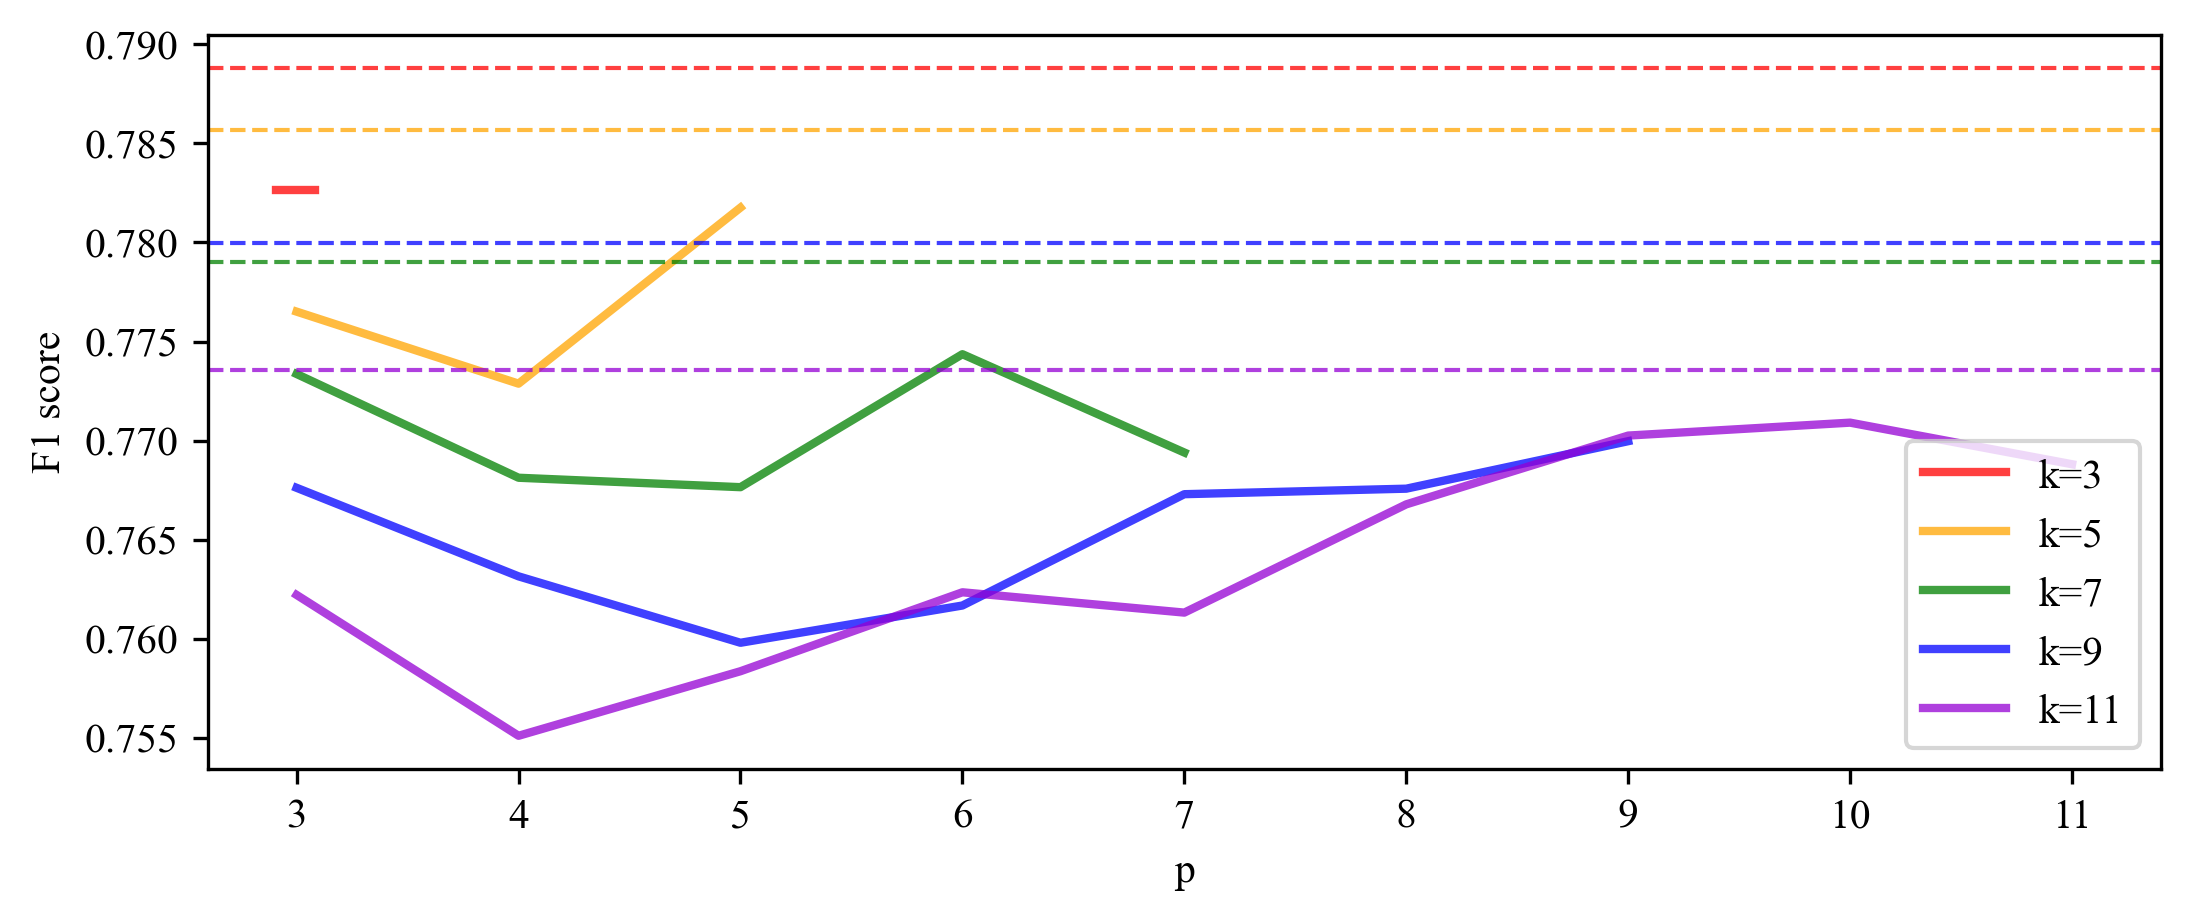

coil_2000


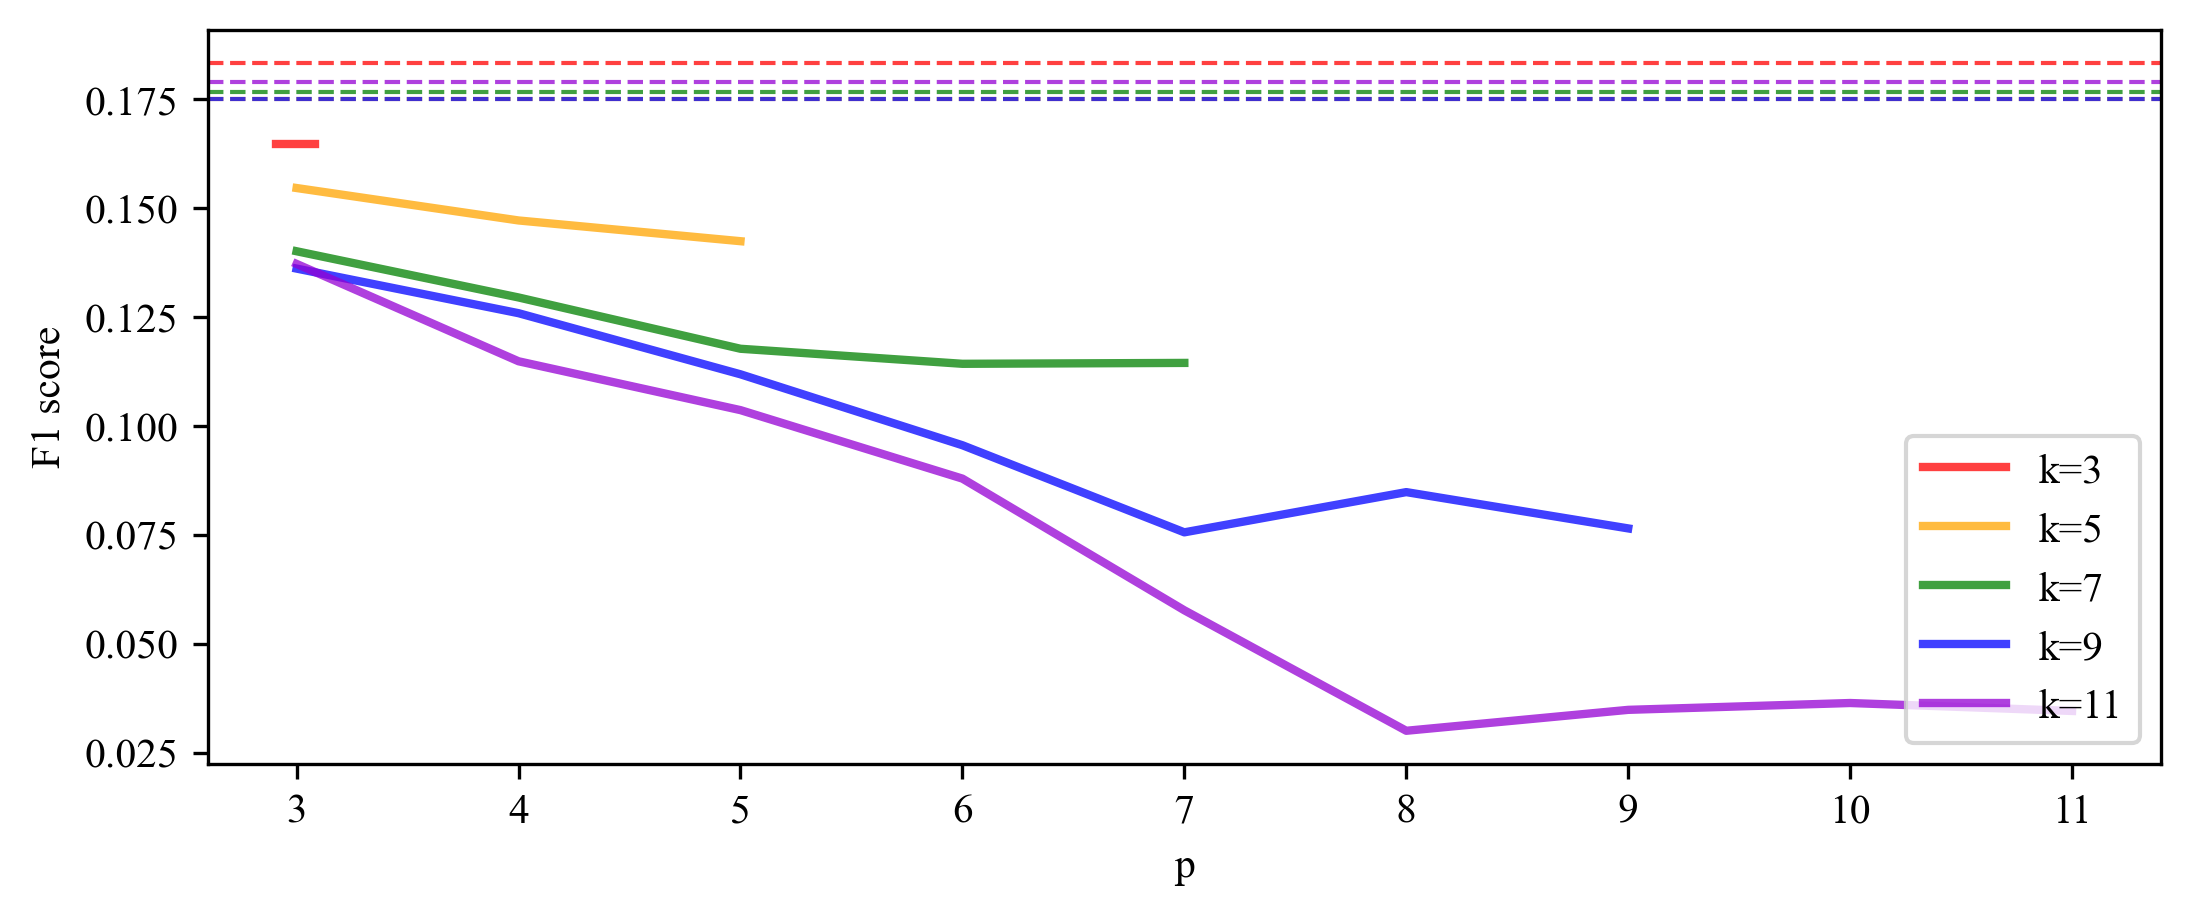

solar_flare_m0


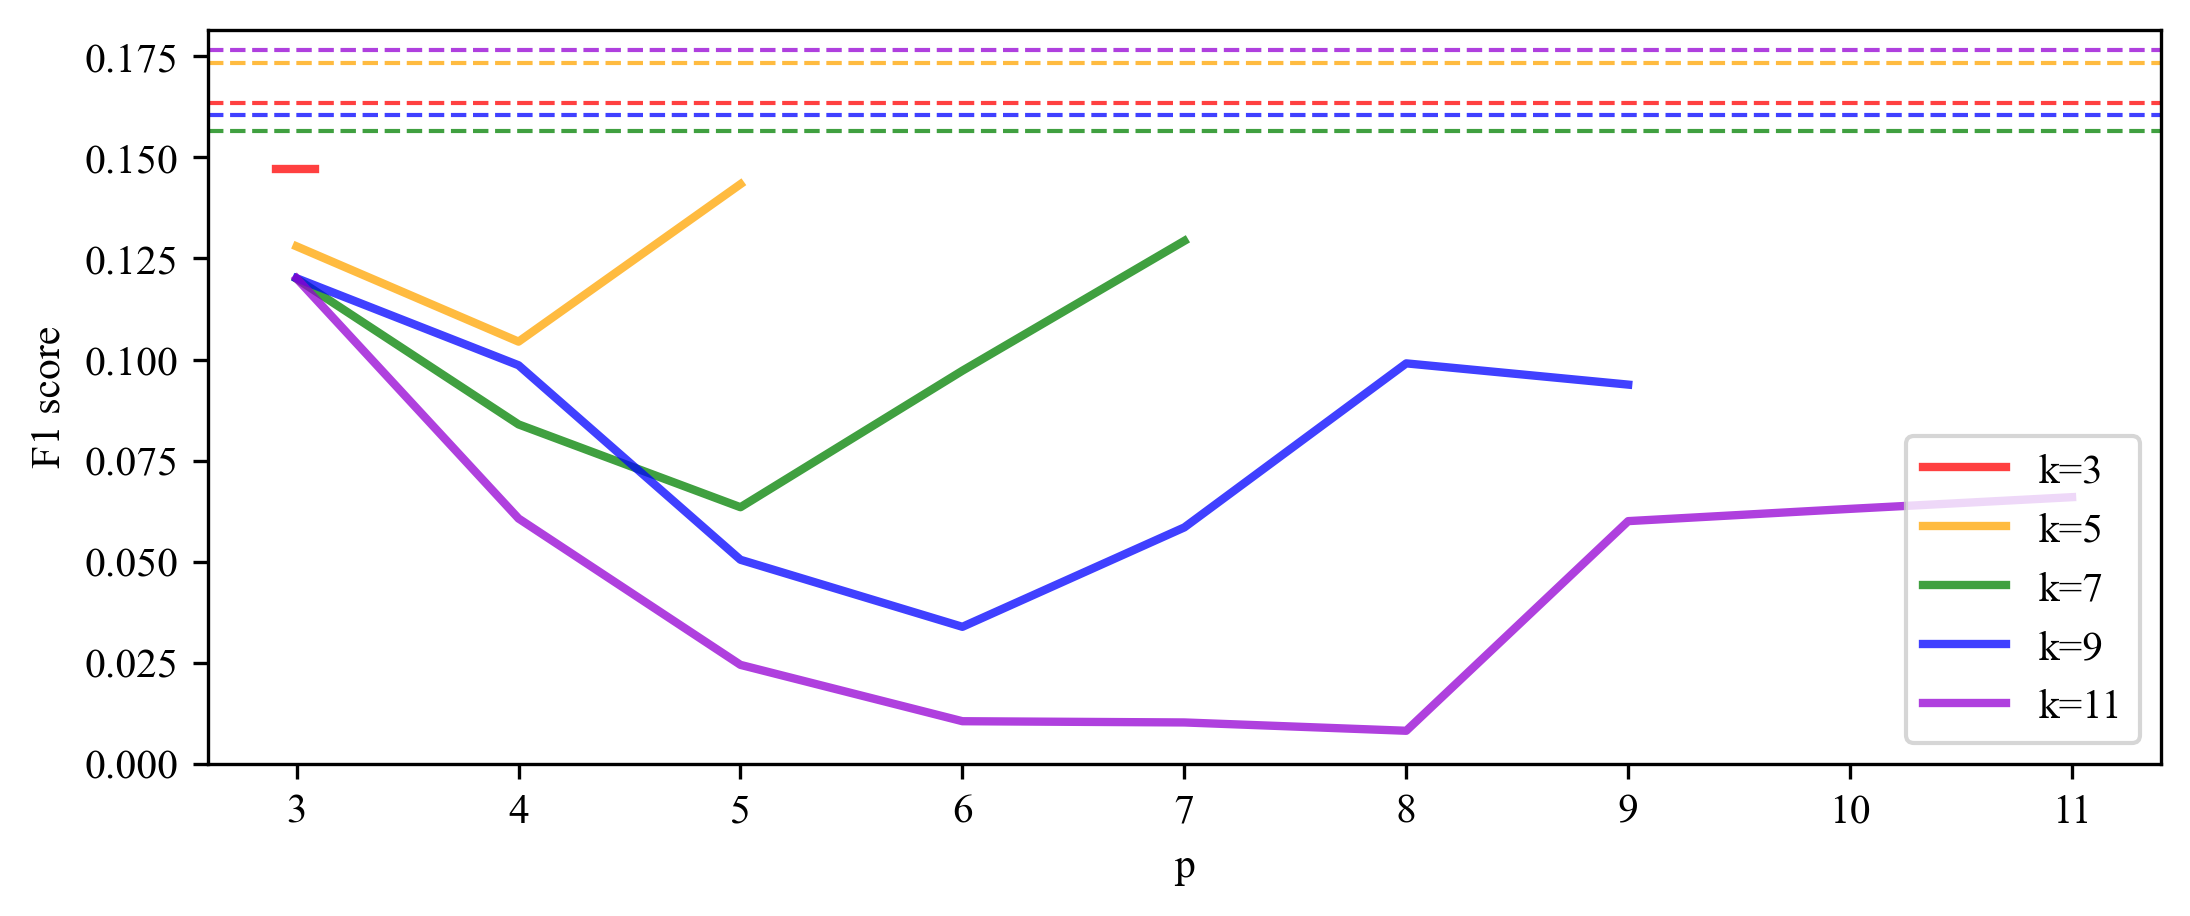

oil


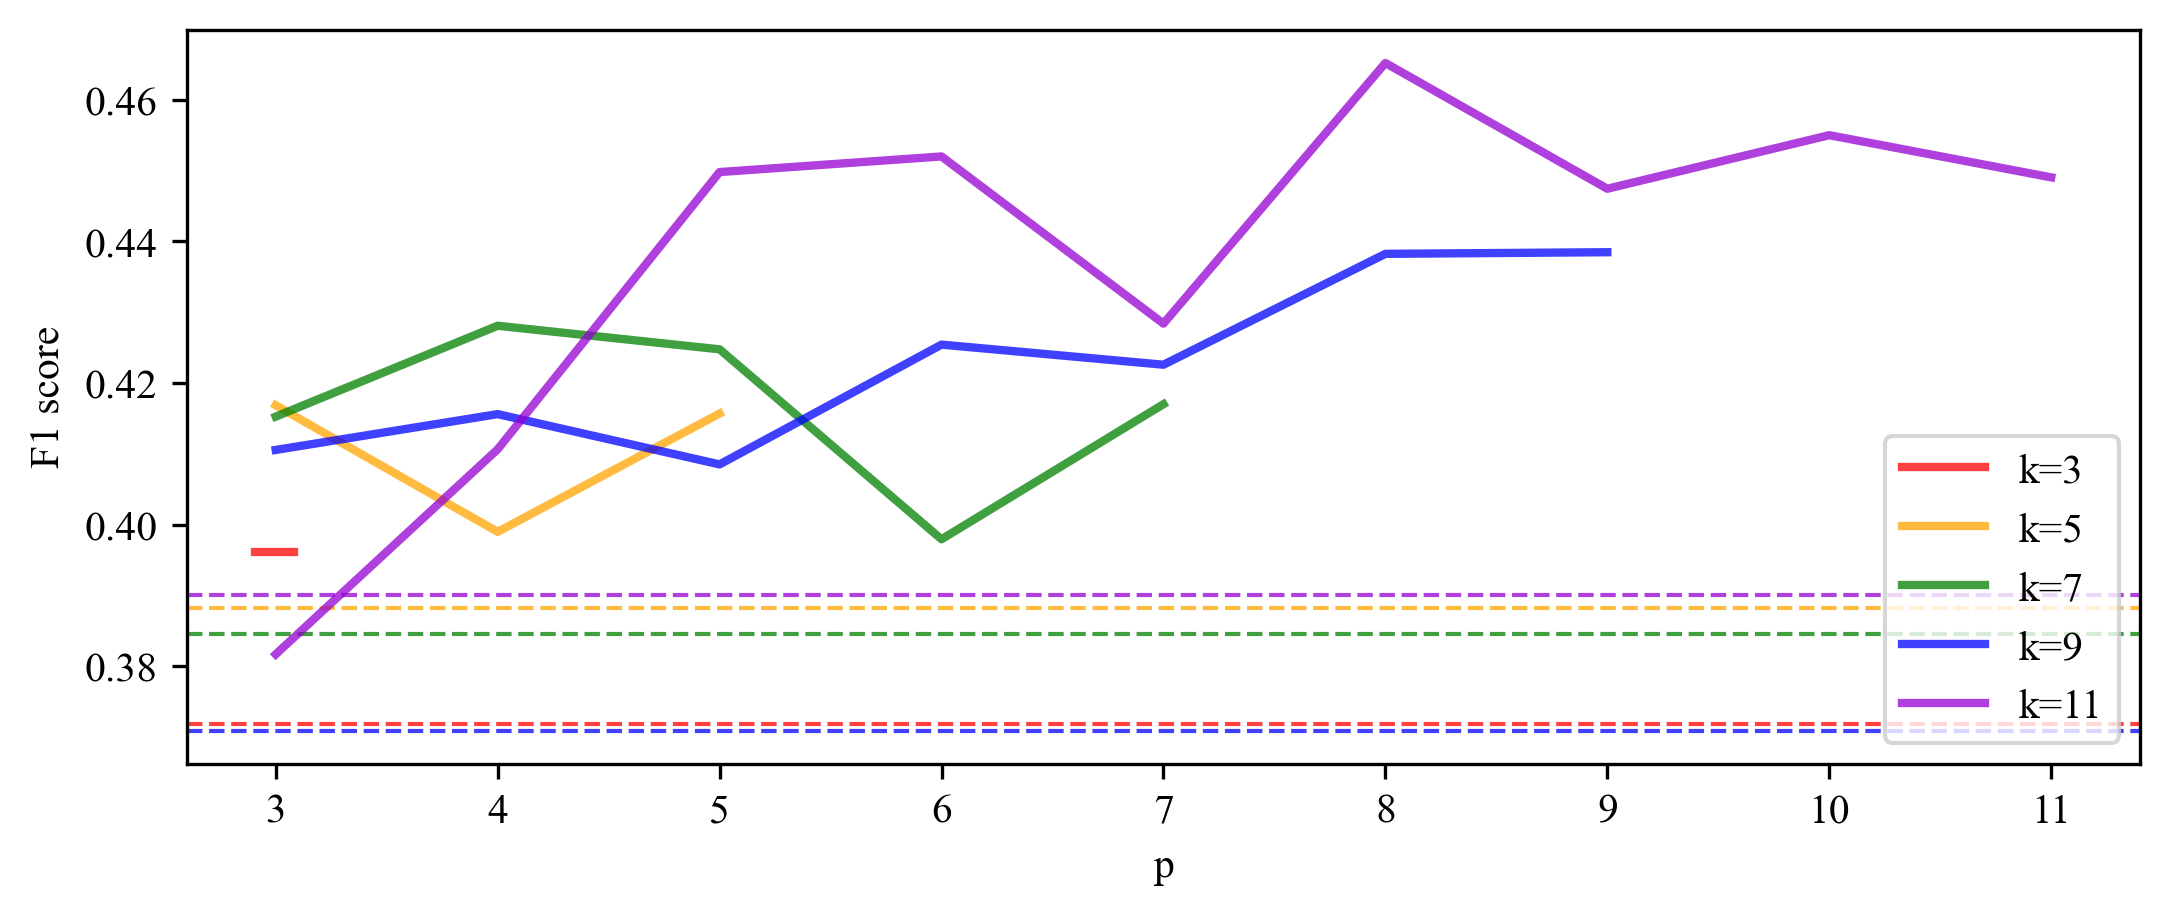

car_eval_4


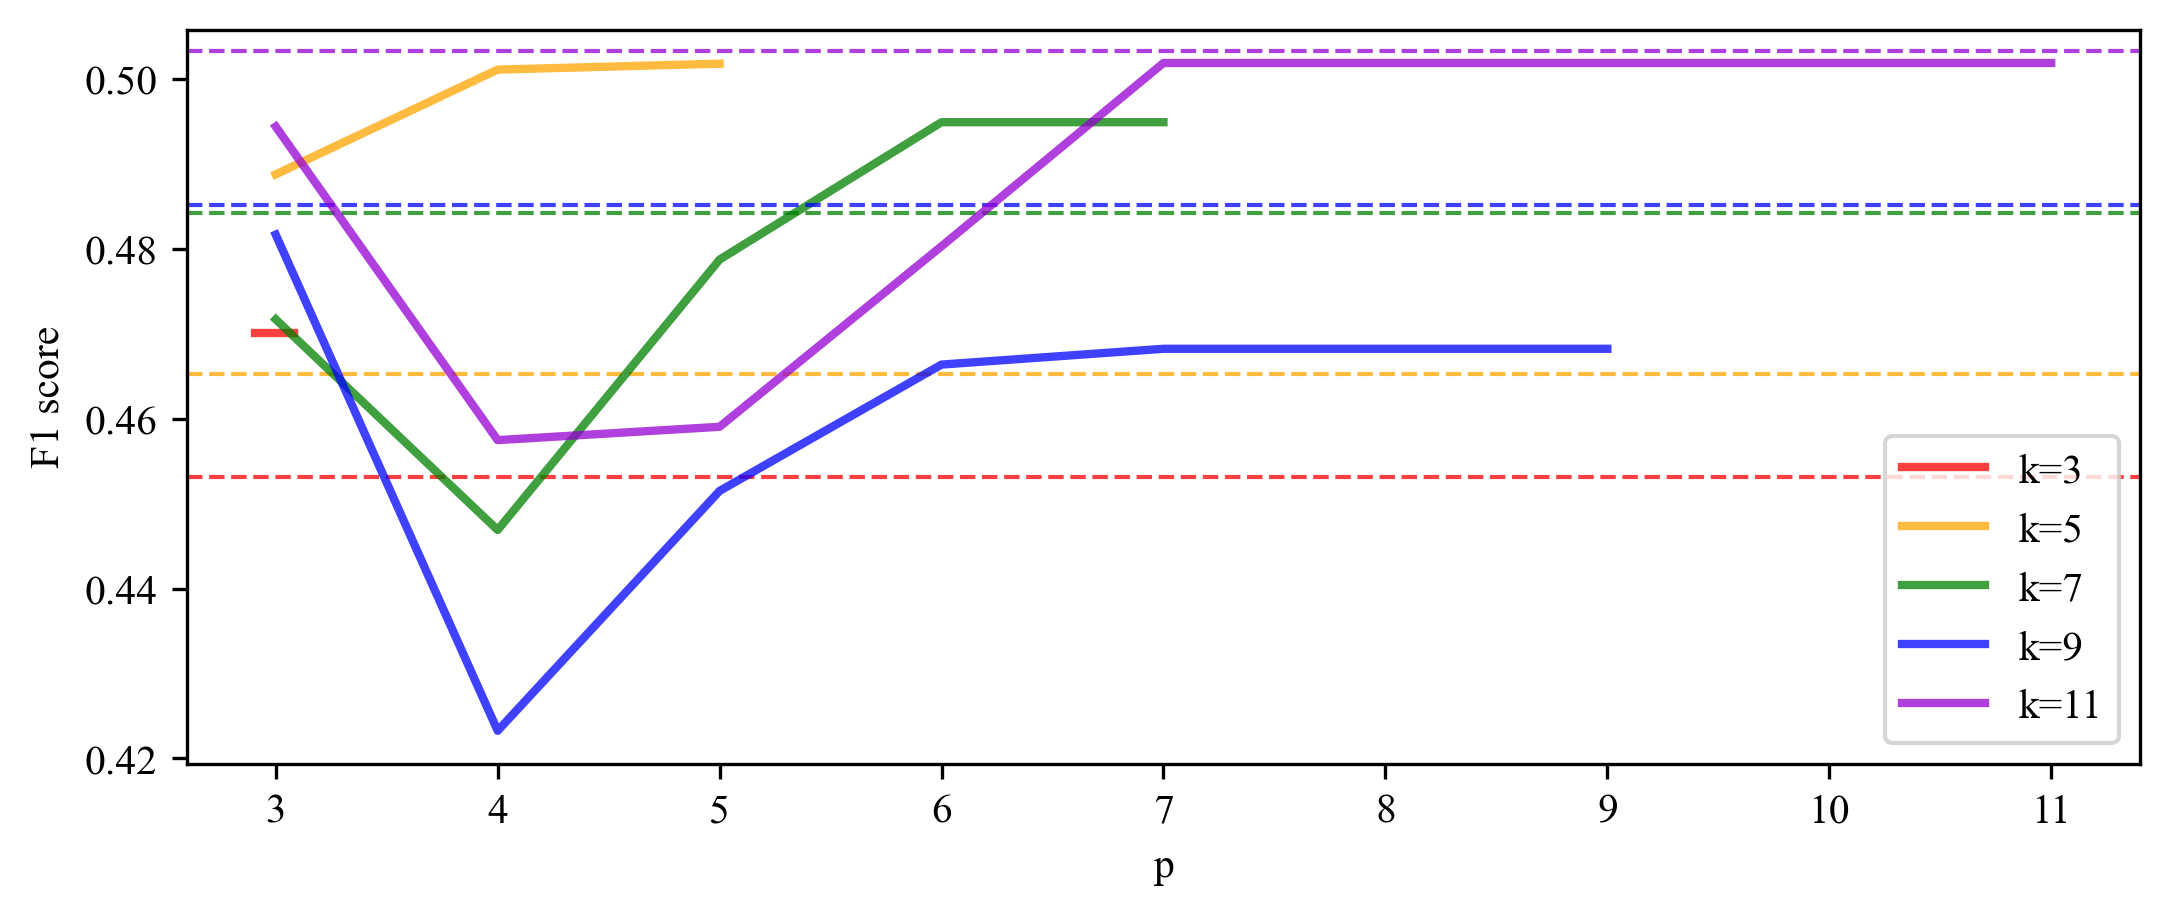

wine_quality


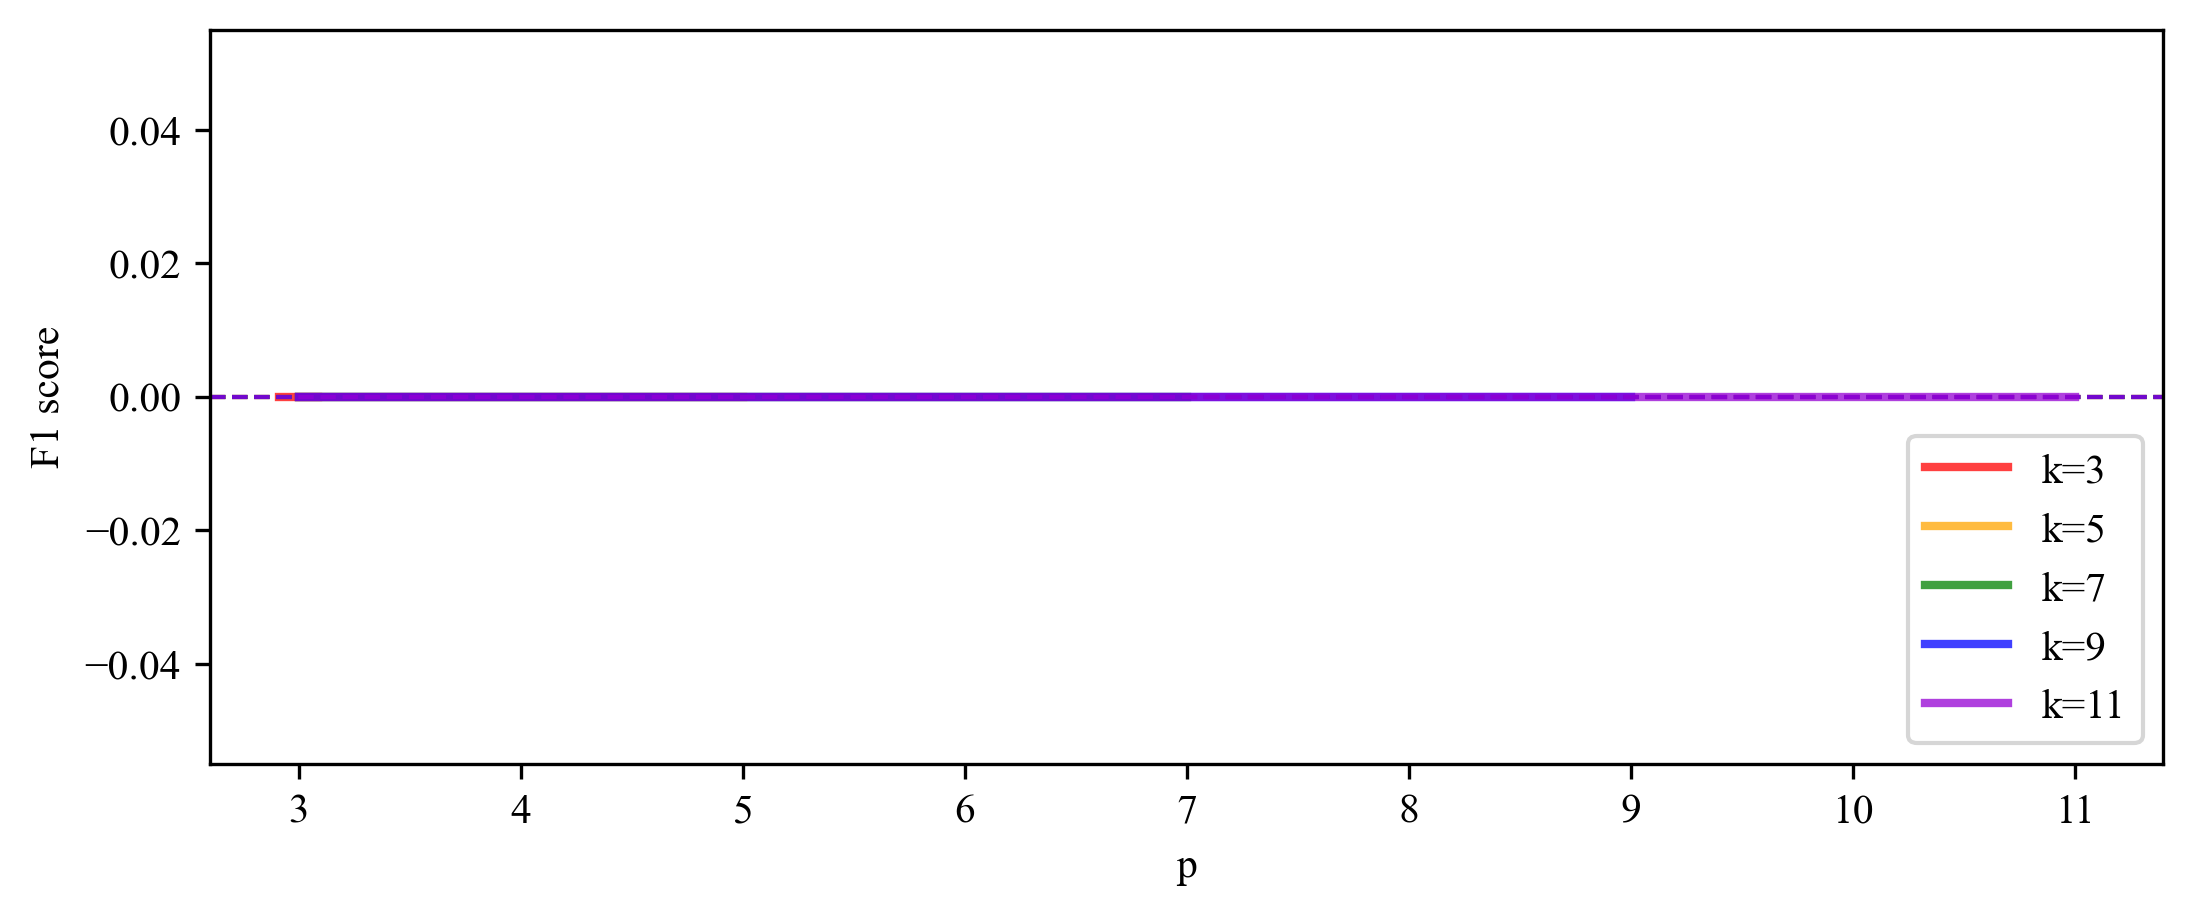

letter_img


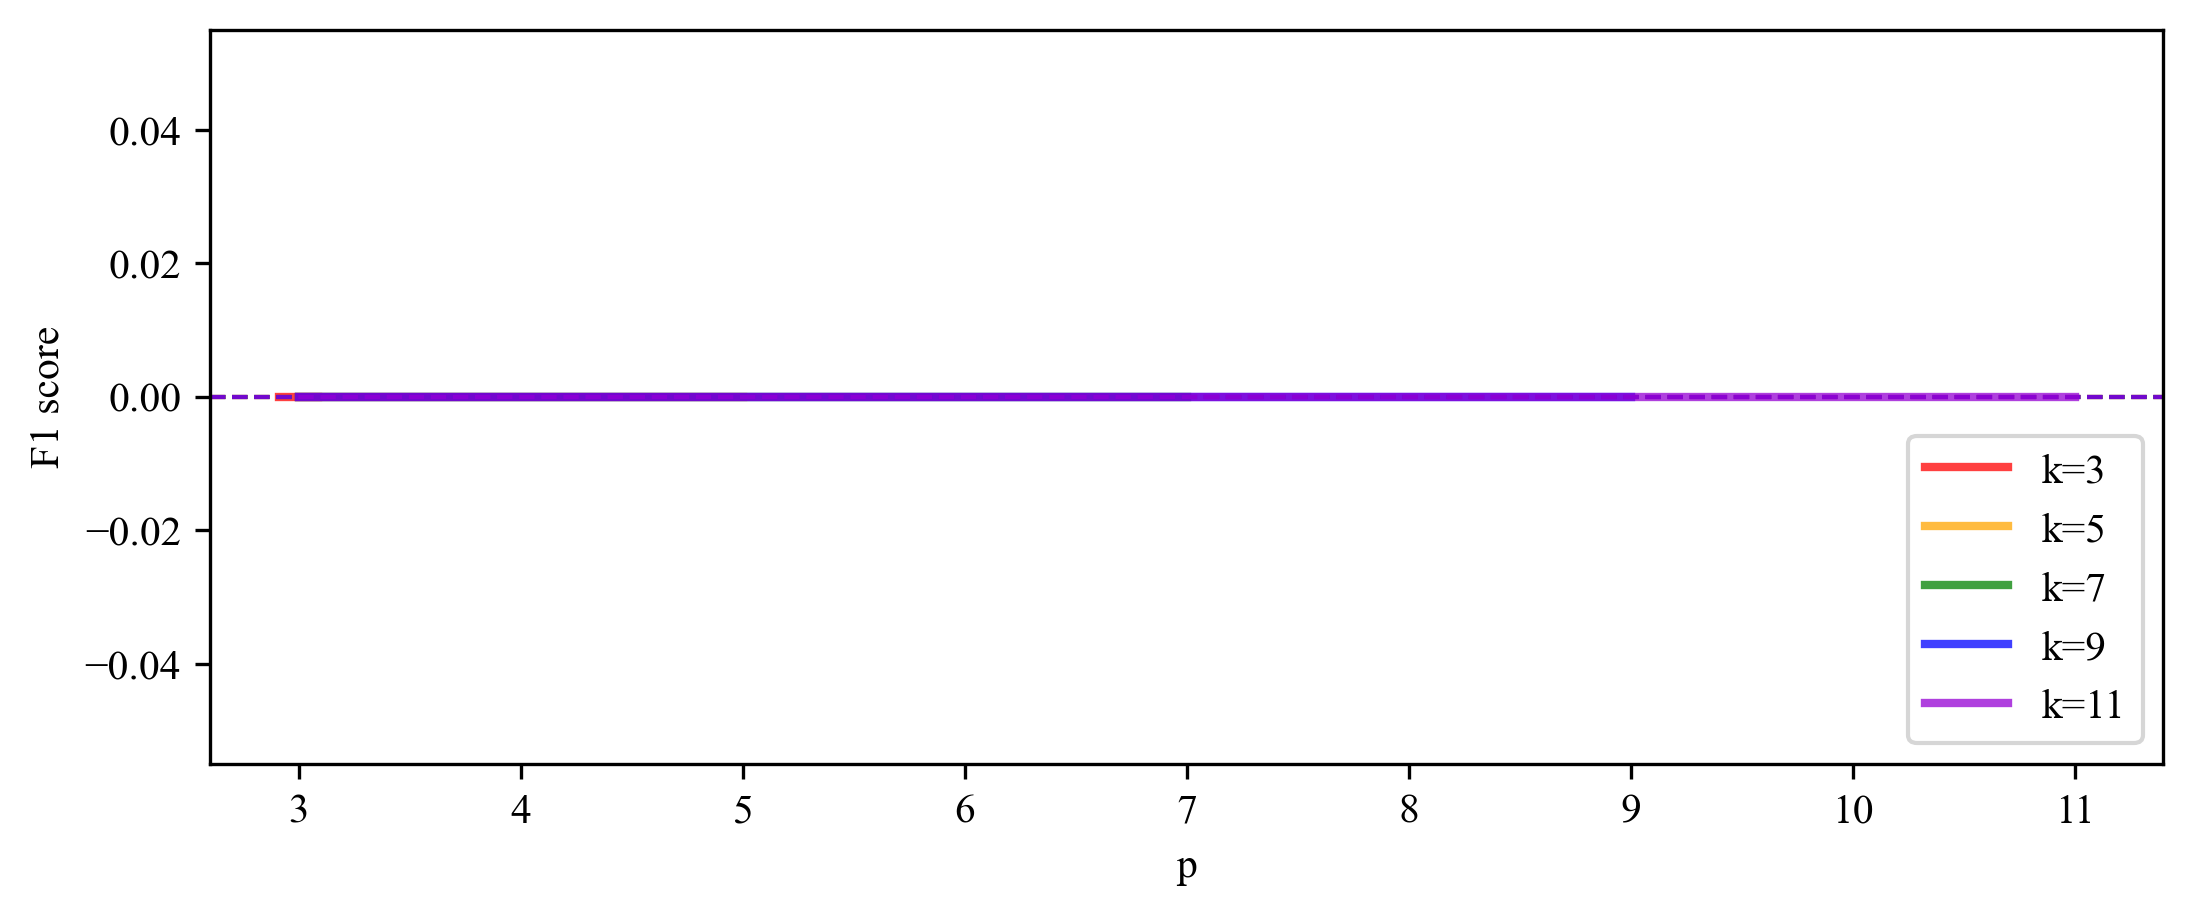

yeast_me2


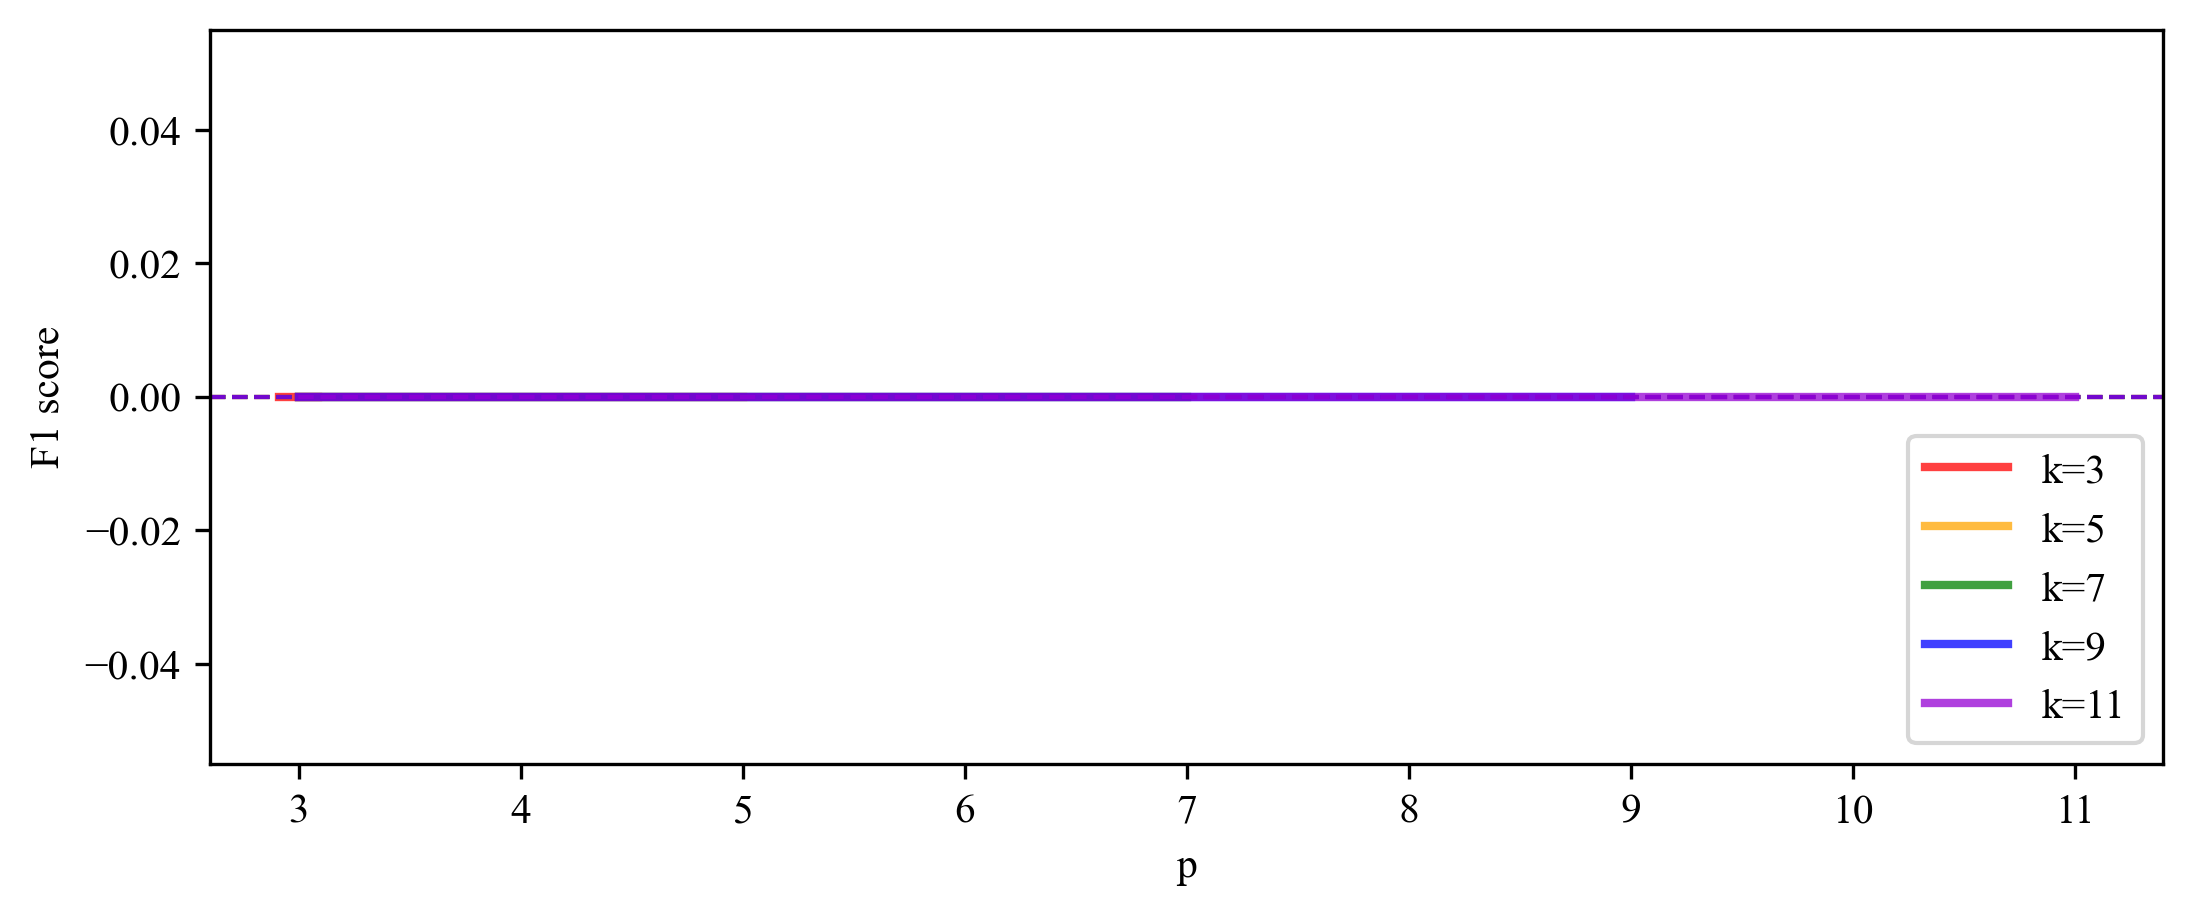

ozone_level


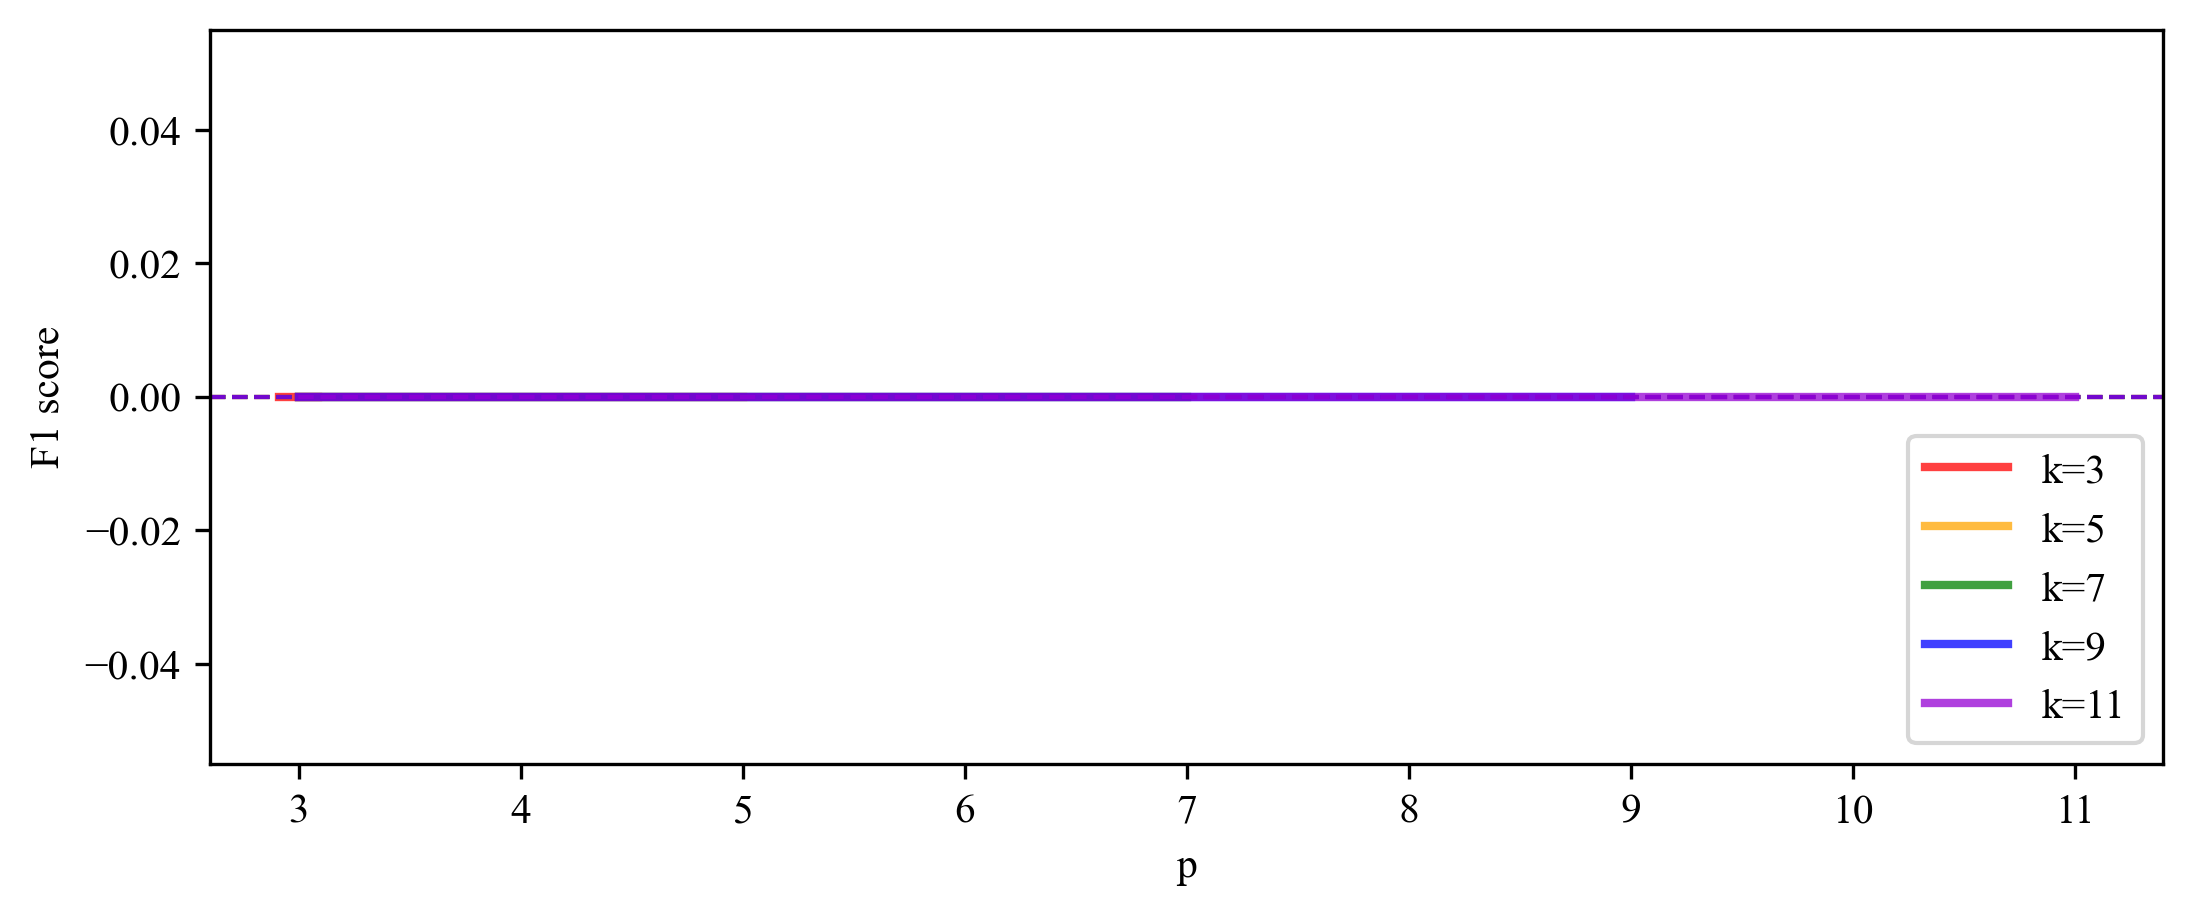

abalone_19


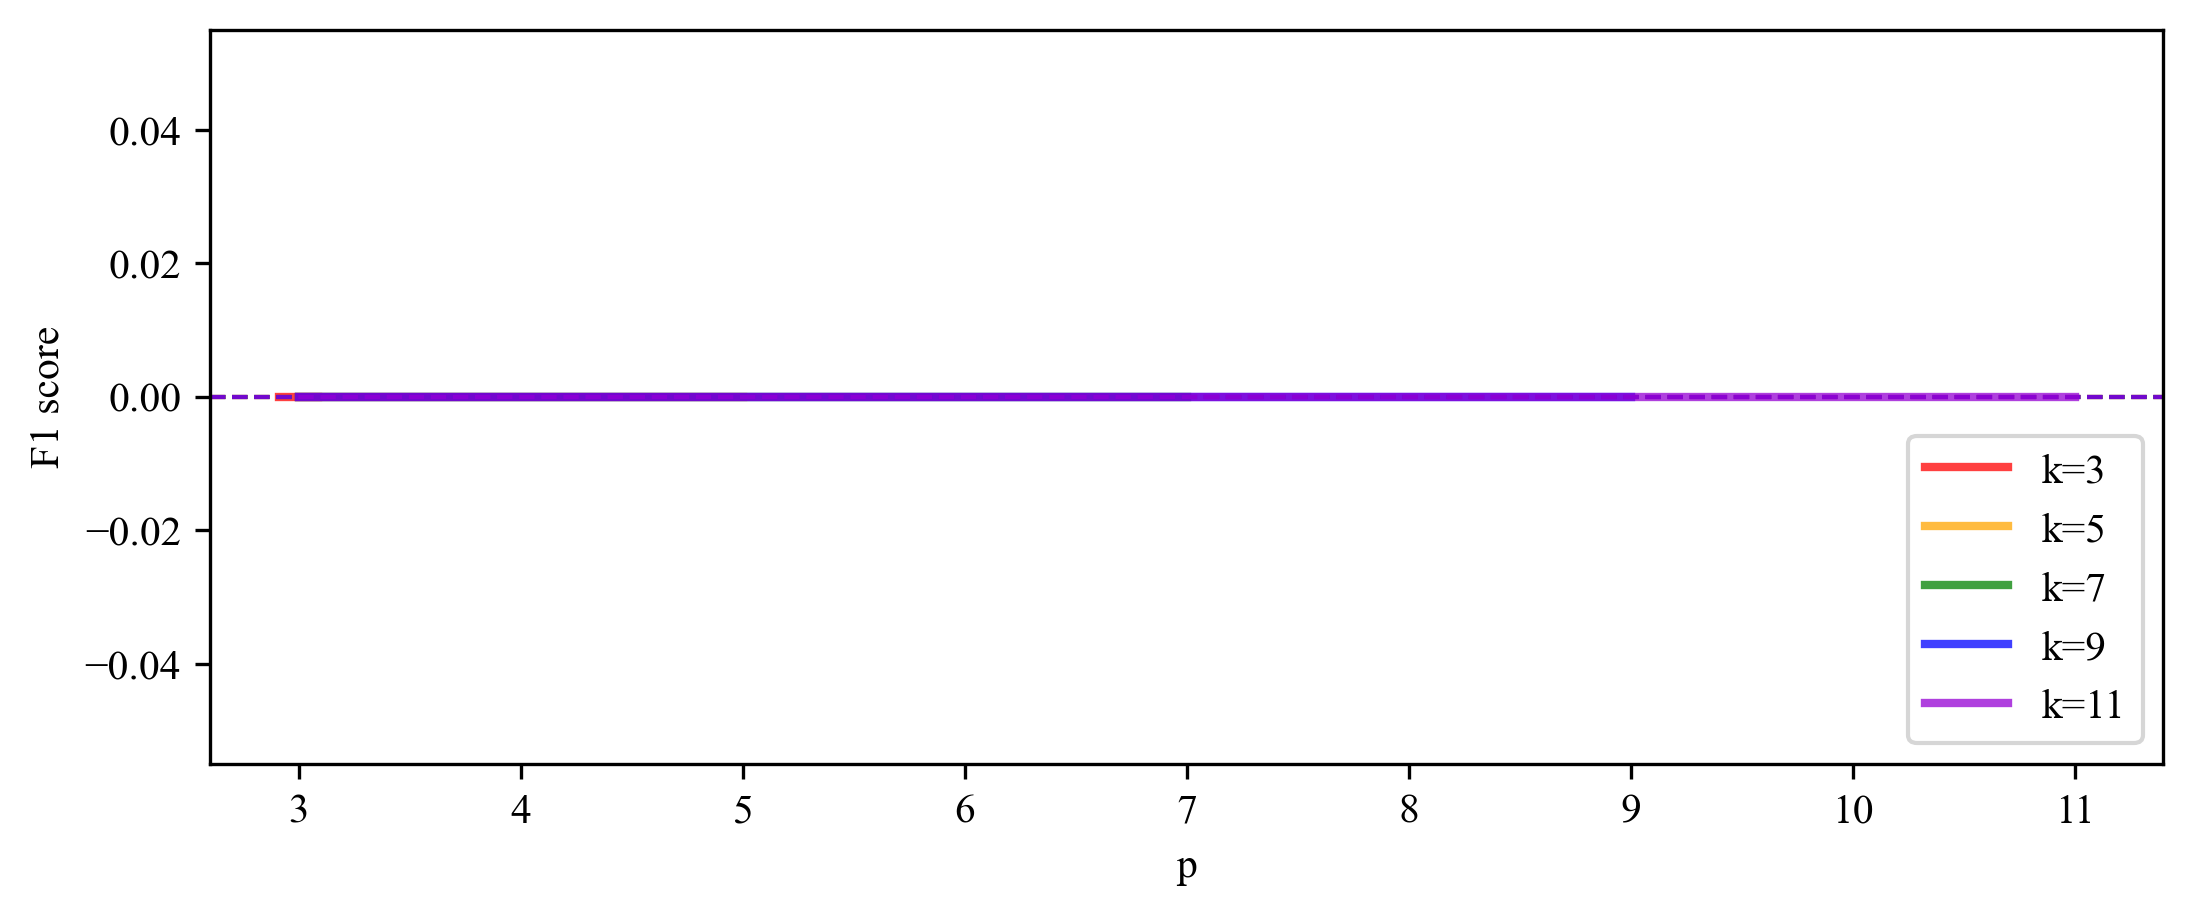

In [7]:
scale = 1.5
alpha = 0.75

for i, dataset in enumerate(datasets):
    
    print(dataset)
    
    # data
    score_smote_i = scores_train_val[i,smote_idx,:,metric_idx,:]
    score_simplicial_i = scores_train_val[i,simplicial_idx,:,metric_idx,:]
    
    # plot
    fig, ax = plt.subplots(ncols=1, figsize=(5.6*scale, 2.12*scale), dpi=300)
    
    for k_idx, k in enumerate(ks):
        if k_idx==0:
            ax.axhline(score_simplicial_i.mean(axis=(0,1))[start_end_idx[k_idx][0]], xmin=0.035, xmax=0.055, linewidth=2, alpha=alpha,label="k={}".format(k), color=colors[k_idx])
        else:
            ax.plot(score_simplicial_i.mean(axis=(0,1))[start_end_idx[k_idx][0]:start_end_idx[k_idx][1]], alpha=alpha, linewidth=2, color=colors[k_idx], label="k={}".format(k))
        ax.axhline(score_smote_i.mean(axis=(0,1))[k_idx], linewidth=1, linestyle="--", alpha=alpha, color=colors[k_idx])
    
    ax.set_xticks(range(0, 11+1-3), range(3, 11+1))
    ax.set_xlim(-0.4, 8.4)
    ax.set_xlabel("p")
    ax.set_ylabel("F1 score")
    
    plt.legend(loc=4)
    plt.show()
